In [5]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [7]:
# Step 2: Load Dataset
df = pd.read_csv("C:\\Users\\SAYAN DAS\\OneDrive\\Desktop\\SkillCraft\\T4\\US_Accidents_March23.csv")

In [9]:
# Step 3: Basic Exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [13]:
print(df.head(3))

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night    

In [19]:
# Step 4: Convert Date/Time and Extract Features
df['Start_Time'] = pd.to_datetime(df['Start_Time'])  # correct column
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

# Visualization

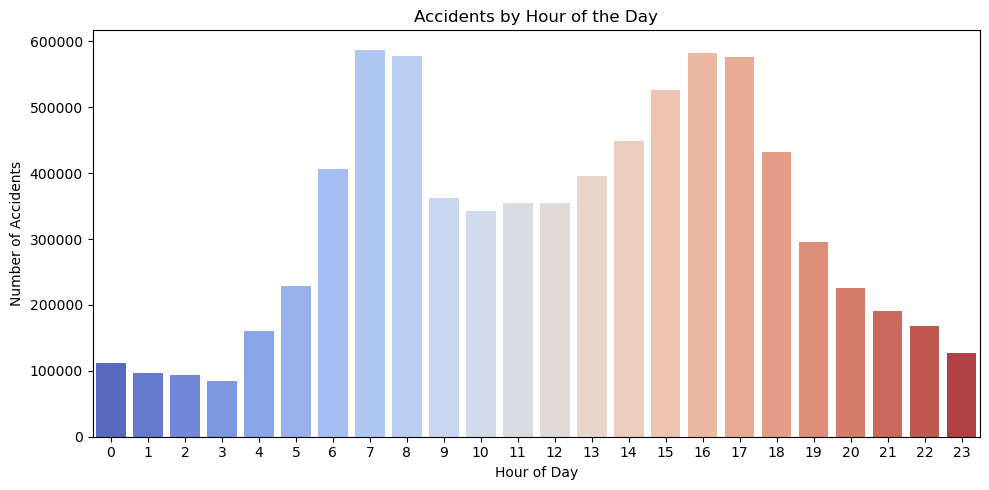

In [20]:
# Daywise accident
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()


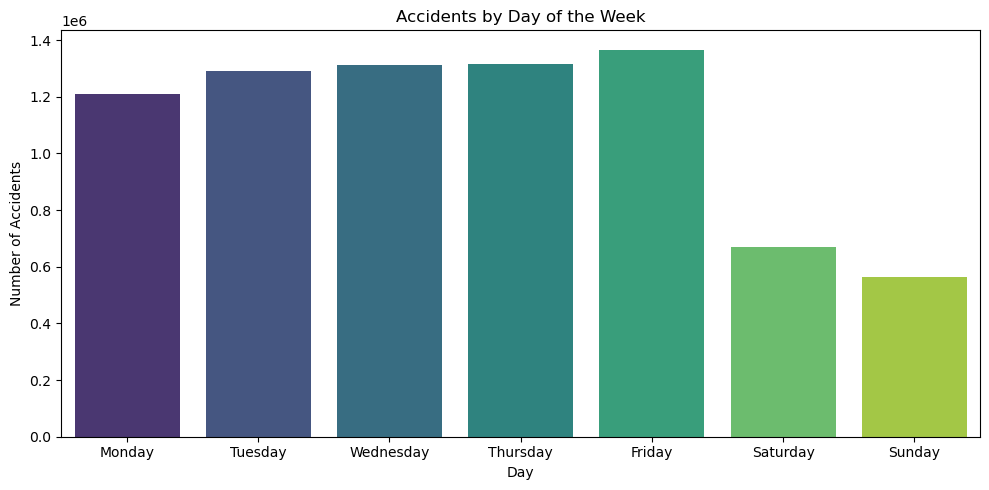

In [22]:
# Accidents by Day of Week
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='DayOfWeek', data=df, order=order, palette='viridis')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

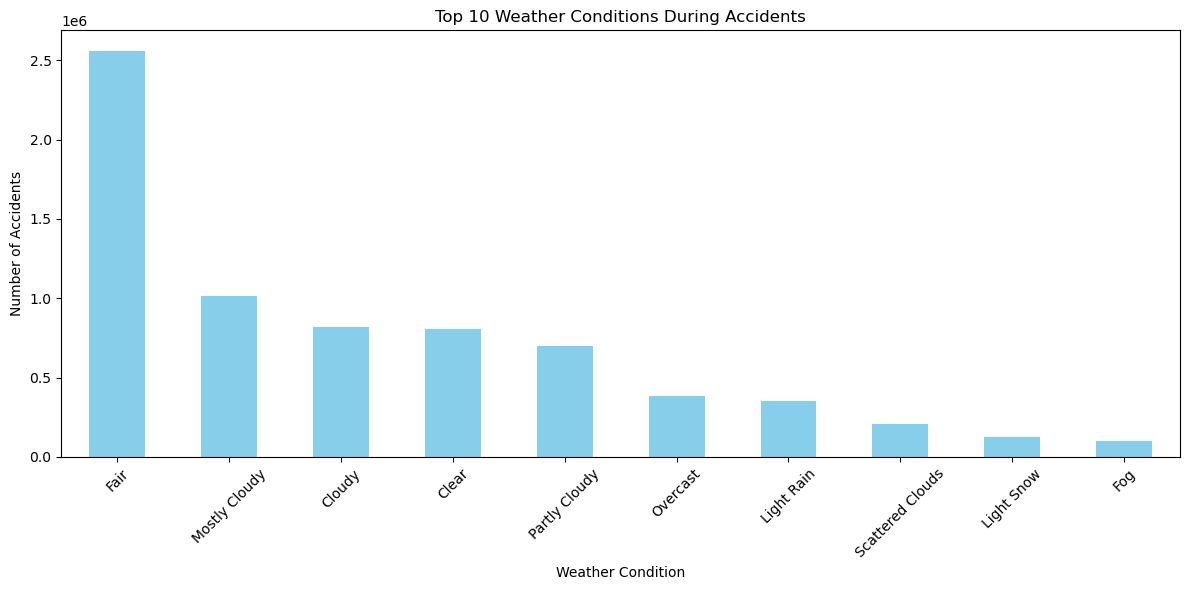

In [23]:
# Step 7: Weather Conditions as in dataset
plt.figure(figsize=(12, 6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

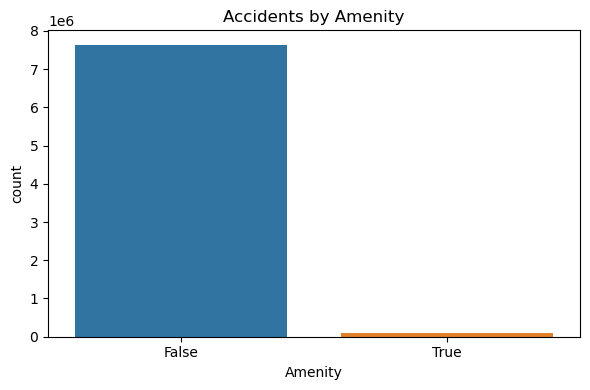

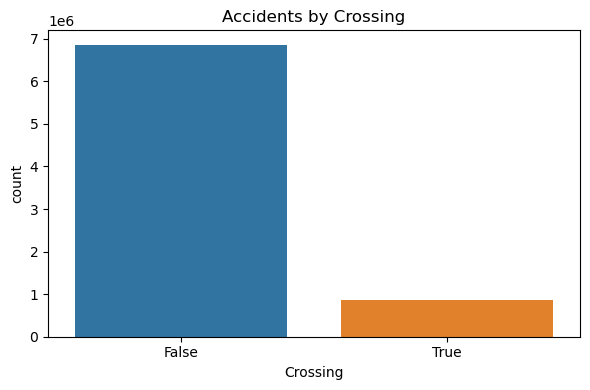

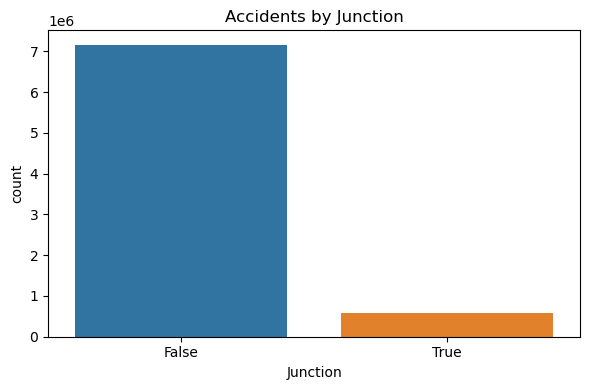

In [24]:
#Road Conditions as on dataset
for col in ['Amenity', 'Crossing', 'Junction']:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=df)
        plt.title(f"Accidents by {col}")
        plt.tight_layout()
        plt.show()

In [30]:
import folium
from folium.plugins import HeatMap

# Creating base map
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)

# Preparing data
heat_data = df[['Start_Lat', 'Start_Lng']].dropna().values.tolist()

# Adding HeatMap layer
HeatMap(heat_data, radius=8).add_to(accident_map)
accident_map.save("accident_hotspots.html")

In [33]:
#To view the above code
import webbrowser
webbrowser.open("accident_hotspots.html")# Run it to view


True